## MSc Data Analytics - Capstone Project 

## Predictive Insights in the Coffee Market: Time Series Models for forecasting of coffee in the commodity stock market

Student id: 2020274 Clarissa Cardoso



This notebook will serve as an experiementation space for using different timeseries models to forecast the prices of coffee in the commodity stock market. The project will use the ICO Composite Indicator Price (I-CIP) of coffee beans available for free in ICO's website under the Public Market Information feature. The ICO Composite Indicator Price serves as a crucial benchmark for understanding the overall trends and movements in the global coffee market, making accurate forecasting essential for stakeholders across the coffee industry.

For the early stages of this experimentation, we have 1 year worth of data available, from 01Feb23 to 29Feb24.

#### Objectives:

- Building and evaluating time series forecasting models to predict future I-CIP values.(focusing on autoregressors)
- Assessing the effectiveness and accuracy of different modeling techniques in capturing the dynamics of the coffee market.

#### Methodology:

Between March and April: 
- Data Collection: gather historical I-CIP data from reliable sources, (spanning multiple years to capture a comprehensive view of market trends. but at least 1 year of data) 
- Data Preprocessing: clean and preprocess the data, handling missing values, outliers, data imputation (?) to consistency for modelling
- Exploratory Data Analysis (EDA): conduct exploratory analysis to gain insights into the underlying patterns, seasonality, and trends present in the I-CIP data.

<br>
April/24
   
- Model Development: build and train various time series forecasting models, including traditional statistical models (e.g., ARIMA) and machine learning algorithms (e.g., LSTM neural networks).
- Model Evaluation: We will evaluate the performance of each model using appropriate metrics, such as mean absolute error (MAE) and root mean squared error (RMSE), to determine their predictive accuracy.
- Forecasting: We will generate forecasts for future I-CIP values using the best-performing model(s) and visualize the results to facilitate interpretation and decision-making.


<br>
<br>
<br><br>
<br>
<br>
<br>
<br>
<br>
<br>






       
         considering the I-CIP values are a weighted average of 4 main types of beans commercialised(Colombian Milds,  Other Milds,  Brazilian Naturals, Robustas), how would the diffenret weights present during the eda, and how they could affect the final icip values?



#### Importing required libraries for the project

In [4]:
#import keras
#import tensorflow as tf

#print("Keras version:", keras.__version__)
#print("TensorFlow version:", tf.__version__)

## The kernel appears to have died. It will restart automatically. 

In [5]:
#importing libraries
import warnings
warnings.filterwarnings("ignore")

import pandas as pd #dataframes 
import numpy as np #linear algebra
import seaborn as sns #visualization
sns.set(color_codes=True)


import plotly.express as px
import plotly.graph_objects as go


import scipy.stats as stats #statistical resources

import matplotlib.pyplot as plt #visualisation 
%matplotlib inline 


from matplotlib import colors
from matplotlib.ticker import PercentFormatter

from sklearn.preprocessing import MinMaxScaler
#from keras.models import Sequential #last update in python causing dead kernel wehn importing keras functions?
#from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
#from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error


In [6]:
#pip install prophet


In [7]:
#prophet library

#from prophet import Prophet
#from prophet.diagnostics import performance_metrics
#from prophet.plot import plot_cross_validation_metric
#from prophet.diagnostics import cross_validation

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')
import pandas as pd



In [8]:
import os
# Listing all the files in the folder
os.listdir("icip_2023") 

## folder contains the free data available in ICO's website, contains data from Feb/23 to Feb/24

['I-CIP_August_2023.csv',
 'I-CIP_September_2023.csv',
 '.DS_Store',
 'I-CIP_April_2023.csv',
 'I-CIP_March_2023.csv',
 'I-CIP_November_2023.csv',
 'I-CIP_Febuary_2024.csv',
 'I-CIP_January_2024.csv',
 'I-CIP_Febuary_2023.csv',
 'I-CIP_October_2023.csv',
 'I-CIP_June_2023.csv',
 'I-CIP_July_2023.csv',
 'I-CIP_December_2023.csv',
 'I-CIP_May_2023.csv']

Files are not in cronological orders, will affect the loop for calling the separate csv's, and cant import them  at the same time to concat them in one single dataframe?

this means the position of each file in the list is as: 

- 'I-CIP_August_2023.csv', [0]
- 'I-CIP_September_2023.csv',[1]
- '.DS_Store',
- 'I-CIP_April_2023.csv',[2]
- 'I-CIP_March_2023.csv',[3]
- 'I-CIP_November_2023.csv',[4]
- 'I-CIP_Febuary_2024.csv',[5] 
 

....
 


In [9]:
#create for loop to import csv files from the folder with less comands.

# create an empty list to store dfs
dataframes = []

# path to folder where csv files are (in this case same directory)
folder_path = "icip_2023"

for file in os.listdir(folder_path):
    if file.endswith(".csv"): #consider only csv files, ignore .DS_Store
        file_path = os.path.join(folder_path, file) #  Construct the full file path
        dataframes.append(pd.read_csv(file_path)) # Read the CSV file and append it to the list

In [10]:
#check the lenght of the directory, how many files exist in the folder
len(dataframes)

13

In [11]:
#check if order of files correspond with the directory list, testing if loop is working
dataframes[9].head()

Unnamed: 0 Unnamed: 1 Colombian   Unnamed: 3 Brazilian Unnamed: 5
0        NaN      I-CIP       NaN  Other Milds       NaN   Robustas
1        NaN        NaN     Milds          NaN  Naturals        NaN
2     01-Jun     173.56    220.40       215.27    181.78     126.54
3     02-Jun     175.62    222.41       216.73    181.98     130.57
4     05-Jun     173.15    219.54       213.37    180.94     127.53

In [12]:
#define a variable name for each dataset to facilitate data manipulation

feb24= dataframes[5]

In [13]:
#cheack first 5 rows of last dataset in the file corresponds to the most recent values from feb24

feb24.info()
print(feb24.shape)
print(feb24.isnull().sum())
feb24.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  21 non-null     object
 1   Unnamed: 1  22 non-null     object
 2   Colombian   22 non-null     object
 3   Unnamed: 3  22 non-null     object
 4   Brazilian   22 non-null     object
 5   Unnamed: 5  22 non-null     object
dtypes: object(6)
memory usage: 1.2+ KB
(23, 6)
Unnamed: 0    2
Unnamed: 1    1
Colombian     1
Unnamed: 3    1
Brazilian     1
Unnamed: 5    1
dtype: int64


Unnamed: 0 Unnamed: 1 Colombian   Unnamed: 3 Brazilian Unnamed: 5
0        NaN      I-CIP       NaN  Other Milds       NaN   Robustas
1        NaN        NaN     Milds          NaN  Naturals        NaN
2     01-Feb     185.24    213.15       212.01    190.15     156.09
3     02-Feb     183.69    212.32       212.94    188.41     153.01
4     05-Feb     180.93    210.11       209.12    185.69     150.65

importing a random dataset to see how the columsn are presented and try to undersand the data structure in place: a messy header and real data starts fromm third row.

First thing to adjust: collumn names and remove NaN values from second row.
- from the basic info function we can see the dates are not in correct format (need to convert to DD-MM-AAAA instead of 01-Feb) and all the values are not in int/float format, they are objects.

I want to combine bthe data from all csv files into a single dataframe for data manipulation but when importing them as panda df, need to make other adjustments - glob?? (https://stackabuse.com/bytes/importing-multiple-csv-files-into-a-single-dataframe-using-pandas-in-python/)

Common Errors as stated by Saturn Cloud (https://saturncloud.io/blog/loading-multiple-csv-files-from-a-folder-into-one-dataframe-a-comprehensive-guide/#1) 

    Incorrect file path: Not setting the working directory correctly or providing an invalid path to the folder containing the CSV files.

    Column mismatch: Assuming all files have the same column names and order. This can lead to errors when merging DataFrames with different structures.




In [14]:

        
### # Concatenate all DataFrames into a single DataFrame and remove null values
###merged_df = pd.concat(dataframes, ignore_index=True, dropna=True) could not include dropna in the same line because 
## concat function doesnt alow this method


# Concatenate all DataFrames into a single DataFrame
merged_df = pd.concat(dataframes, ignore_index=True)

# Remove null values from the concatenated DataFrame
#merged_df.dropna(inplace=True) this function removed all values, leaving an emppty df. 

# Display the merged DataFrame
print(merged_df)

    Unnamed: 0 Unnamed: 1 Colombian   Unnamed: 3 Brazilian Unnamed: 5  \
0          NaN      I-CIP       NaN  Other Milds       NaN   Robustas   
1          NaN        NaN     Milds          NaN  Naturals        NaN   
2       01-Aug     161.70    196.62       197.67    164.03     127.08   
3       02-Aug     163.62    198.66       199.72    166.00     128.82   
4       03-Aug     161.68    196.28       197.32    163.52     127.77   
..         ...        ...       ...          ...       ...        ...   
300     25-May        NaN    222.17       217.37    182.38     123.94   
301     26-May        NaN    220.39       215.81    180.94     123.98   
302     29-May        NaN    220.52       215.05    181.73     124.68   
303     30-May        NaN    215.91       210.53    177.23     124.47   
304     31-May        NaN    216.84       211.48    178.19     124.45   

    ICO Composite  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  
.. 

setting dropna=True, any rows with null values will be removed from the concatenated DataFrame. However this function caused an empty dataframe? Also, the files are still not in cronological order, so need to find a way to import them in the correct order. When we remove the dropna function from the merged_df, at the same time the values get misplaced into a new column, which is also not adequate for manipulation.

In [15]:
merged_df.head()

Unnamed: 0 Unnamed: 1 Colombian   Unnamed: 3 Brazilian Unnamed: 5  \
0        NaN      I-CIP       NaN  Other Milds       NaN   Robustas   
1        NaN        NaN     Milds          NaN  Naturals        NaN   
2     01-Aug     161.70    196.62       197.67    164.03     127.08   
3     02-Aug     163.62    198.66       199.72    166.00     128.82   
4     03-Aug     161.68    196.28       197.32    163.52     127.77   

  ICO Composite  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN

In [16]:
merged_df.tail()

Unnamed: 0 Unnamed: 1 Colombian Unnamed: 3 Brazilian Unnamed: 5  \
300     25-May        NaN    222.17     217.37    182.38     123.94   
301     26-May        NaN    220.39     215.81    180.94     123.98   
302     29-May        NaN    220.52     215.05    181.73     124.68   
303     30-May        NaN    215.91     210.53    177.23     124.47   
304     31-May        NaN    216.84     211.48    178.19     124.45   

    ICO Composite  
300        173.46  
301        172.49  
302        172.84  
303        169.87  
304        170.47

Before continuing, ill try to first rename the columns and remove the NaN values in each dataframe separately, to ensure all dfs will be in the same shape to facilitate concatenation, also might be easier to import them in the correct order once this is done?


In [17]:
# Define a list of new column names
new_column_names = {'Unnamed: 0': 'date', 
                    'Unnamed: 1': 'I-CIP', 'Colombian':'colombian_milds', 
                    'Unnamed: 3':'other_milds', 'Brazilian':'brazilian_nat', 'Unnamed: 5':'robustas'}


# Apply changes to each DataFrame separately
for df in dataframes:
    # Rename columns
    df.rename(columns=new_column_names, inplace=True)
    
    # Remove NaN values
  #  df.dropna(inplace=True) this one makes all dataframes empty again.

In [18]:
print(len(dataframes)) #check is list is not empty anymore

13


In [19]:
## can see the changes were applied and that also all dfs follow the same pattern of having NaN values on the 
## first 2 rows, so i can either perfom a similar loop to drop these rows and merge them in the correct order?
print(dataframes[1].head())
print(dataframes[2].head())
print(dataframes[4].head())
print(dataframes[8].head())
print(dataframes[6].head())
print(dataframes[3].head())
print(dataframes[10].head())

     date   I-CIP colombian_milds  other_milds brazilian_nat  robustas
0     NaN   I-CIP             NaN  Other Milds           NaN  Robustas
1     NaN     NaN           Milds          NaN      Naturals       NaN
2  01-Sep  152.36          184.05       183.14        151.88    124.26
3  04-Sep  152.01          183.75       182.60        151.43    124.09
4  05-Sep  153.02          185.15       184.01        152.88    124.34
     date      ICO Composite colombian_milds  other_milds brazilian_nat  \
0     NaN                NaN             NaN  Other Milds           NaN   
1     NaN  Indicator (I-CIP)           Milds          NaN      Naturals   
2  03-Apr             168.87          222.30       219.78        183.11   
3  04-Apr             168.14          220.82       218.29        181.52   
4  05-Apr             172.44          225.91       223.38        186.70   

   robustas  
0  Robustas  
1       NaN  
2    109.10  
3    109.80  
4    112.63  
     date   I-CIP colombian_milds  othe

In [20]:
# Drop the first two rows in each DataFrame that contain NaN
for df in dataframes:
    df.drop(df.index[:2], inplace=True)

In [21]:
#print test across different months to see changes
print(dataframes[1].head())
print(dataframes[2].head())
print(dataframes[4].head())
print(dataframes[8].head())

     date   I-CIP colombian_milds other_milds brazilian_nat robustas
2  01-Sep  152.36          184.05      183.14        151.88   124.26
3  04-Sep  152.01          183.75      182.60        151.43   124.09
4  05-Sep  153.02          185.15      184.01        152.88   124.34
5  06-Sep  153.39          186.34      185.01        154.83   122.74
6  07-Sep  151.58          181.98      185.21        151.52   121.88
     date ICO Composite colombian_milds other_milds brazilian_nat robustas
2  03-Apr        168.87          222.30      219.78        183.11   109.10
3  04-Apr        168.14          220.82      218.29        181.52   109.80
4  05-Apr        172.44          225.91      223.38        186.70   112.63
5  06-Apr        173.75          228.43      225.90        189.30   111.71
6  07-Apr        173.96          228.72      226.04        189.39   112.03
     date   I-CIP colombian_milds other_milds brazilian_nat robustas
2  01-Nov  153.32          187.15      186.58        158.95   117.8

In [22]:
#define a variable name for each dataset to facilitate data manipulation
# but now for each month, give them a variable so i can concat them in the correct order
# might be a but extra work but the lambda function didnt work even after renaming the original files and adding '_'
# also the natsorted library was not enabled in my machine
feb24= dataframes[5]
jan24=dataframes[6]
dec23=dataframes[11]
nov23=dataframes[4]
oct23=dataframes[8]
sep23=dataframes[1]
aug23=dataframes[0]
jul23=dataframes[10]
jun23=dataframes[9]
may23=dataframes[12]
apr23=dataframes[2]
mar23=dataframes[3]
feb23=dataframes[7]

In [23]:
print(dataframes)



[      date   I-CIP colombian_milds other_milds brazilian_nat robustas
2   01-Aug  161.70          196.62      197.67        164.03   127.08
3   02-Aug  163.62          198.66      199.72        166.00   128.82
4   03-Aug  161.68          196.28      197.32        163.52   127.77
5   04-Aug  158.15          192.33      192.15        159.20   126.01
6   07-Aug  160.76          194.43      194.65        161.75   128.91
7   08-Aug  160.03          192.70      193.63        160.61   129.03
8   09-Aug  158.62          191.14      191.37        158.39   128.88
9   10-Aug  158.26          191.29      191.28        158.61   127.69
10  11-Aug  155.96          188.35      187.47        155.31   127.33
11  14-Aug  151.31          183.40      182.46        149.96   123.60
12  15-Aug  150.92          182.53      181.59        149.34   123.86
13  16-Aug  149.07          181.45      180.49        147.98   120.90
14  17-Aug  149.34          181.10      179.23        148.87   121.72
15  18-Aug  149.68 

#another issue was identified from the original data here
the first 4 months contain a different column lables for the icip prices, probably somne changes in the way data was collected initially or some changes in ICO's processing techniques, and the merged.df added a column with  missing values in place for the 'ghost' feature, it seems to have 2 diffent names for the price column  even after i renamed the collumns in previuos lines (ICO Composite and I-CIP). So before i merge them toghether in cronolgical order, ill adjust these features. Or could i just merge the dfs without the labels?


Another issue here is the fact that the date format is not in the correct format, as mentioned above. So the idea is to adjust this in each file separetly before merging them togheter in the correct order, because when i first tried to add the YYYY/MM/DD altogether after merging the files in sequence, the values from feb 23 and feb 24 all returned as 2023 (probably should have given other parameters to consider, since this is the only month that repeates. the months between march and jan only appear one time each. 


      
         



In [24]:
# this function will hopefuly change the dates from i.e: '01-Jul' to '2023-07-01' 

def transform_date(df, year):
    # Define a dictionary mapping month abbreviations to their respective numbers
    month_mapping = {
        'Jan': '01', 'Feb': '02', 'Mar': '03', 'Apr': '04',
        'May': '05', 'Jun': '06', 'Jul': '07', 'Aug': '08',
        'Sep': '09', 'Oct': '10', 'Nov': '11', 'Dec': '12'
    }

    # Apply the transformation to the 'date' column
    df['date'] = df['date'].apply(lambda x: '-'.join([str(year), month_mapping[x.split('-')[1]], x.split('-')[0]]))

    # Convert the 'date' column to datetime format
    df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

    return df

# Example usage:
# Assuming 'df' is your DataFrame for a specific month and '2023' is the year
# transformed_df = transform_date(df, 2023)

In [25]:
#testing if function is working
feb23 = transform_date(feb23, 2023)
print(feb23.head())

        date ICO Composite colombian_milds other_milds brazilian_nat robustas
2 2023-02-01        171.43          235.92      223.22        191.65   102.31
3 2023-02-02        172.50          237.34      226.26        192.86   102.00
4 2023-02-03        169.47          232.24      221.86        188.61   101.52
5 2023-02-06        171.29          235.17      224.80        190.77   102.02
6 2023-02-07        172.14          235.65      226.72        191.92   102.10


In [26]:
# apply transform_date to all files
feb24= transform_date(feb24, 2024)
jan24=transform_date(jan24, 2024)
dec23=transform_date(dec23, 2023)
nov23=transform_date(nov23, 2023)
oct23=transform_date(oct23, 2023)
sep23=transform_date(sep23, 2023)
aug23=transform_date(aug23, 2023)
jul23=transform_date(jul23, 2023)
jun23=transform_date(jun23, 2023)
may23=transform_date(may23, 2023)
apr23=transform_date(apr23, 2023)
mar23=transform_date(mar23, 2023)

In [27]:
# Define the list of DataFrames in the desired order
dfs_in_order = [feb23, mar23, apr23, may23, jun23, jul23, aug23, sep23, oct23, nov23, dec23, jan24, feb24]

# Concatenate the DataFrames
merged_df = pd.concat(dfs_in_order,ignore_index=True)

# Display the merged DataFrame
merged_df

date ICO Composite colombian_milds other_milds brazilian_nat  \
0   2023-02-01        171.43          235.92      223.22        191.65   
1   2023-02-02        172.50          237.34      226.26        192.86   
2   2023-02-03        169.47          232.24      221.86        188.61   
3   2023-02-06        171.29          235.17      224.80        190.77   
4   2023-02-07        172.14          235.65      226.72        191.92   
..         ...           ...             ...         ...           ...   
274 2024-02-23           NaN          204.48      202.46        183.74   
275 2024-02-26           NaN          204.12      202.11        183.48   
276 2024-02-27           NaN          207.11      205.10        186.34   
277 2024-02-28           NaN          206.01      204.00        185.39   
278 2024-02-29           NaN          207.67      205.52        186.73   

    robustas   I-CIP  
0     102.31     NaN  
1     102.00     NaN  
2     101.52     NaN  
3     102.02     NaN  
4     102.10     NaN  
..       ...     ...  
274   149.40  177.80  
275   149.08  177.48  
276   151.51  180.23  
277   150.23  179.12  
278   150.40  180.11  

[279 rows x 7 columns]

In [28]:
# Rename columns of the first four DataFrames to match the later DataFrames
feb23.rename(columns={'Unnamed: 0': 'date', 'ICO Composite': 'I-CIP'}, inplace=True)
mar23.rename(columns={'Unnamed: 0': 'date', 'ICO Composite': 'I-CIP'}, inplace=True)
apr23.rename(columns={'Unnamed: 0': 'date', 'ICO Composite': 'I-CIP'}, inplace=True)
may23.rename(columns={'Unnamed: 0': 'date', 'ICO Composite': 'I-CIP'}, inplace=True)

# Concatenate the DataFrames in the desired order
merged_df = pd.concat([feb23, mar23, apr23, may23, jun23, jul23, aug23, sep23, oct23, nov23, dec23, jan24, feb24], ignore_index=True)

# Display the merged DataFrame
print(merged_df)

          date   I-CIP colombian_milds other_milds brazilian_nat robustas
0   2023-02-01  171.43          235.92      223.22        191.65   102.31
1   2023-02-02  172.50          237.34      226.26        192.86   102.00
2   2023-02-03  169.47          232.24      221.86        188.61   101.52
3   2023-02-06  171.29          235.17      224.80        190.77   102.02
4   2023-02-07  172.14          235.65      226.72        191.92   102.10
..         ...     ...             ...         ...           ...      ...
274 2024-02-23  177.80          204.48      202.46        183.74   149.40
275 2024-02-26  177.48          204.12      202.11        183.48   149.08
276 2024-02-27  180.23          207.11      205.10        186.34   151.51
277 2024-02-28  179.12          206.01      204.00        185.39   150.23
278 2024-02-29  180.11          207.67      205.52        186.73   150.40

[279 rows x 6 columns]


## EDA

Perfom some basic eda to see how the data is presented after the merge
However, when looking at the .info output, before obtaining any sort of relevant eda i need to make the correct conversions for datatypes that can be used foer forecasting. It was also noted that having the dates as 01-Feb is not at all helpfull, so first need to add the year to facilitate the conversion https://pandas.pydata.org/docs/user_guide/timeseries.html It also does not consider the year of each datapoint. 



In [29]:
# Summary Statistics
print(merged_df.info())
merged_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             279 non-null    datetime64[ns]
 1   I-CIP            279 non-null    object        
 2   colombian_milds  279 non-null    object        
 3   other_milds      279 non-null    object        
 4   brazilian_nat    279 non-null    object        
 5   robustas         279 non-null    object        
dtypes: datetime64[ns](1), object(5)
memory usage: 13.2+ KB
None


date   I-CIP colombian_milds other_milds brazilian_nat  \
count                   279     279             279         279           279   
unique                  279     270             274         273           272   
top     2023-02-01 00:00:00  173.84          192.70      212.69        180.94   
freq                      1       2               2           3             2   
first   2023-02-01 00:00:00     NaN             NaN         NaN           NaN   
last    2024-02-29 00:00:00     NaN             NaN         NaN           NaN   

       robustas  
count       279  
unique      267  
top      126.65  
freq          3  
first       NaN  
last        NaN

In [30]:
# Convert numerical columns to numeric type

#merged_df['date'] = pd.to_datetime(merged_df['date']) 

merged_df['I-CIP'] = pd.to_numeric(merged_df['I-CIP'])
merged_df['colombian_milds'] = pd.to_numeric(merged_df['colombian_milds'])
merged_df['other_milds'] = pd.to_numeric(merged_df['other_milds'])
merged_df['brazilian_nat'] = pd.to_numeric(merged_df['brazilian_nat'])
merged_df['robustas'] = pd.to_numeric(merged_df['robustas'])

# Confirm the data types after conversion
print(merged_df.dtypes)

date               datetime64[ns]
I-CIP                     float64
colombian_milds           float64
other_milds               float64
brazilian_nat             float64
robustas                  float64
dtype: object


In [31]:
merged_df.head(10)

date   I-CIP  colombian_milds  other_milds  brazilian_nat  robustas
0 2023-02-01  171.43           235.92       223.22         191.65    102.31
1 2023-02-02  172.50           237.34       226.26         192.86    102.00
2 2023-02-03  169.47           232.24       221.86         188.61    101.52
3 2023-02-06  171.29           235.17       224.80         190.77    102.02
4 2023-02-07  172.14           235.65       226.72         191.92    102.10
5 2023-02-08  171.23           234.06       225.13         190.38    102.35
6 2023-02-09  169.89           232.17       223.54         188.61    101.71
7 2023-02-10  170.31           233.38       223.14         189.73    101.76
8 2023-02-13  171.50           235.34       224.91         191.24    102.06
9 2023-02-14  175.86           241.56       231.13         197.28    103.26

In [32]:
print(merged_df.tail())
print(merged_df.shape)

          date   I-CIP  colombian_milds  other_milds  brazilian_nat  robustas
274 2024-02-23  177.80           204.48       202.46         183.74    149.40
275 2024-02-26  177.48           204.12       202.11         183.48    149.08
276 2024-02-27  180.23           207.11       205.10         186.34    151.51
277 2024-02-28  179.12           206.01       204.00         185.39    150.23
278 2024-02-29  180.11           207.67       205.52         186.73    150.40
(279, 6)


In [33]:
merged_df.describe()

I-CIP  colombian_milds  other_milds  brazilian_nat    robustas
count  279.000000       279.000000   279.000000     279.000000  279.000000
mean   167.806344       208.039391   205.646452     175.466631  125.725233
std     10.987927        18.839311    16.566665      15.712895   14.122864
min    145.990000       178.820000   174.970000     147.660000  101.520000
25%    158.515000       191.510000   192.210000     160.720000  117.625000
50%    170.110000       206.310000   204.100000     179.980000  124.470000
75%    176.955000       225.185000   220.645000     188.370000  131.700000
max    187.290000       249.040000   242.710000     207.450000  158.780000

 Considering the ICIP values, we have 279 data points showing the prices of the I-CIP. On average, the price is about 167.80 usd. The prices range from as low as 145.99usd to as high as 187.29usd showing some flutctuation over the 1 year of data collected so far. Most of the prices (from the 25th to the 75th percentile) fall between 158.51usd and 176.95usd, with the median of 170 usd. This suggests that while the majority of prices are clustered around the average, there are some higher-priced outliers.

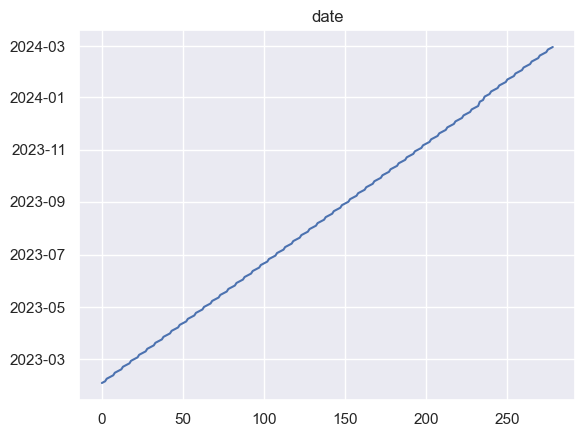

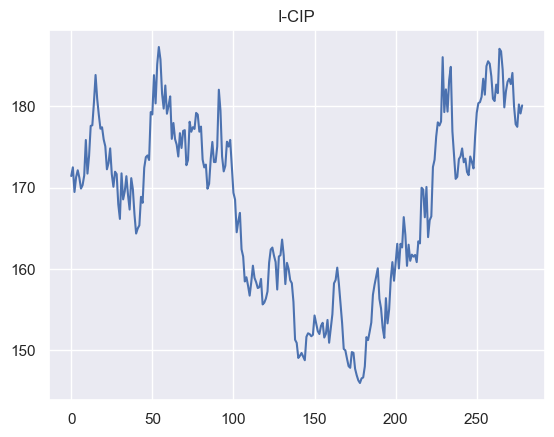

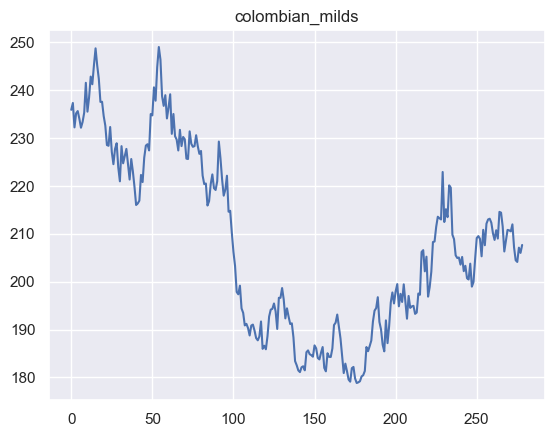

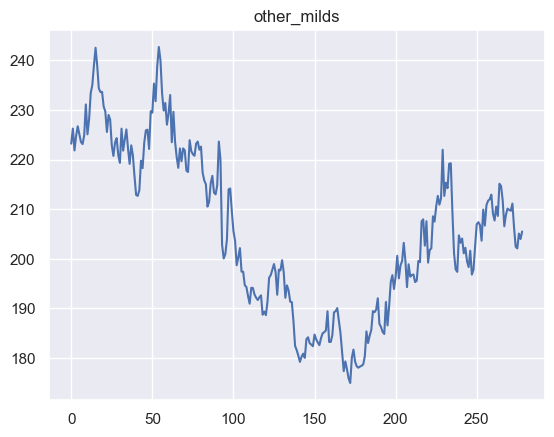

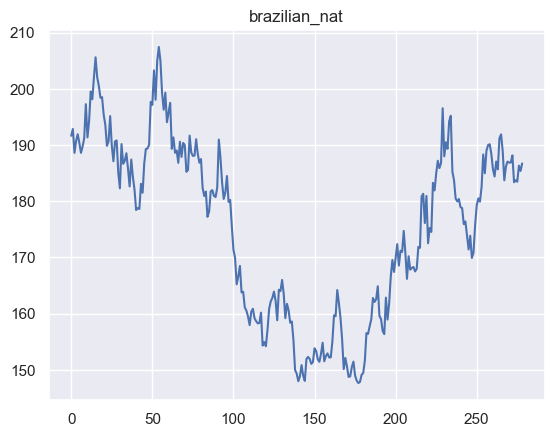

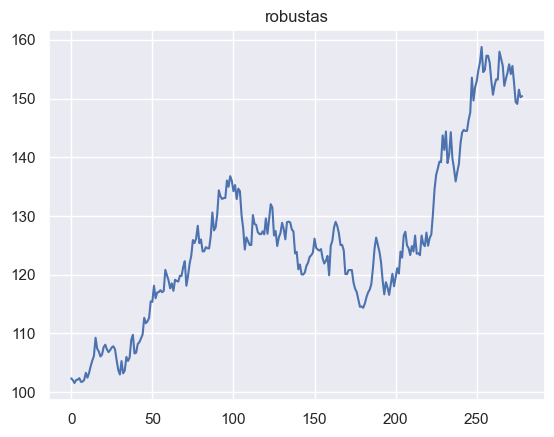

In [34]:
for column in merged_df.columns:
    plt.plot(merged_df[column])
    plt.title(column)
    plt.show()
# tranform date column to correct datetime type and make it as index!

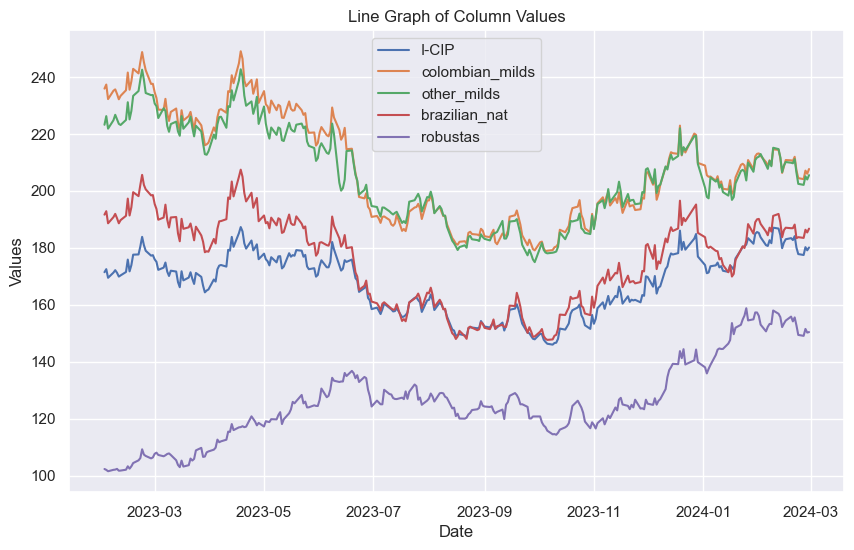

In [35]:
import matplotlib.pyplot as plt

# Iterate over columns and plot each one on the same graph
plt.figure(figsize=(10, 6))
for column in merged_df.columns:
    if column != 'date':  # Exclude 'date' column from plotting
        plt.plot(merged_df['date'], merged_df[column], label=column)

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Line Graph of Column Values')
plt.legend()

# Show plot
plt.show()

In [36]:
#date feature mmust be the index!

#create new variable for merged_df and reseting date as the index for building time series in later stages
# Set 'date' column as index
merged_df.set_index('date', inplace=True)

#print output
icip_df = merged_df
print(icip_df.head())

             I-CIP  colombian_milds  other_milds  brazilian_nat  robustas
date                                                                     
2023-02-01  171.43           235.92       223.22         191.65    102.31
2023-02-02  172.50           237.34       226.26         192.86    102.00
2023-02-03  169.47           232.24       221.86         188.61    101.52
2023-02-06  171.29           235.17       224.80         190.77    102.02
2023-02-07  172.14           235.65       226.72         191.92    102.10


In [37]:
icip_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 279 entries, 2023-02-01 to 2024-02-29
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   I-CIP            279 non-null    float64
 1   colombian_milds  279 non-null    float64
 2   other_milds      279 non-null    float64
 3   brazilian_nat    279 non-null    float64
 4   robustas         279 non-null    float64
dtypes: float64(5)
memory usage: 13.1 KB


### Checkin for Missing Values 


In [38]:
icip_df.isna().sum()

I-CIP              0
colombian_milds    0
other_milds        0
brazilian_nat      0
robustas           0
dtype: int64

The dataset contains 279 observations, ranging between February 1, 2023, to February 29, 2024.
It consists of 5 columns, all of which are now numeric (float64 dtype) and a DatetimeIndex
There are no missing values in any of the columns.

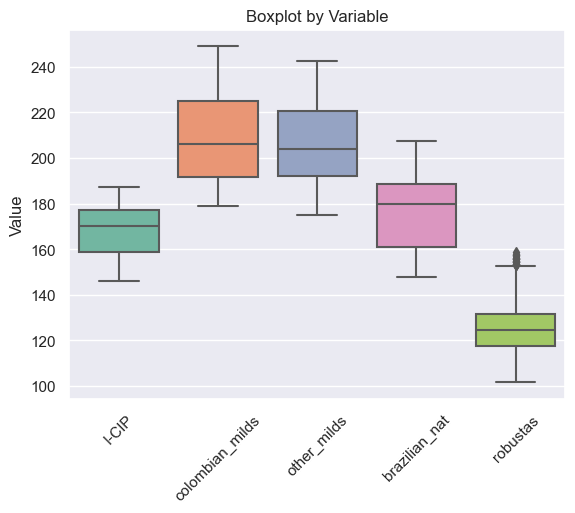

In [39]:
sns.boxplot(data=icip_df, orient='v', palette='Set2')
plt.title('Boxplot by Variable')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

In [40]:
import plotly.graph_objects as go

# Define colors from the Set2 palette
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854']

# Create boxplot traces
box_traces = []
for i, column in enumerate(icip_df.columns):
    box_trace = go.Box(y=icip_df[column], name=column, marker=dict(color=colors[i]))
    box_traces.append(box_trace)

# Create layout
layout = go.Layout(title='Boxplot by Variable', yaxis=dict(title='Value'), xaxis=dict(title='Variable'))

# Create figure
fig = go.Figure(data=box_traces, layout=layout)

# Show plot
fig.show()

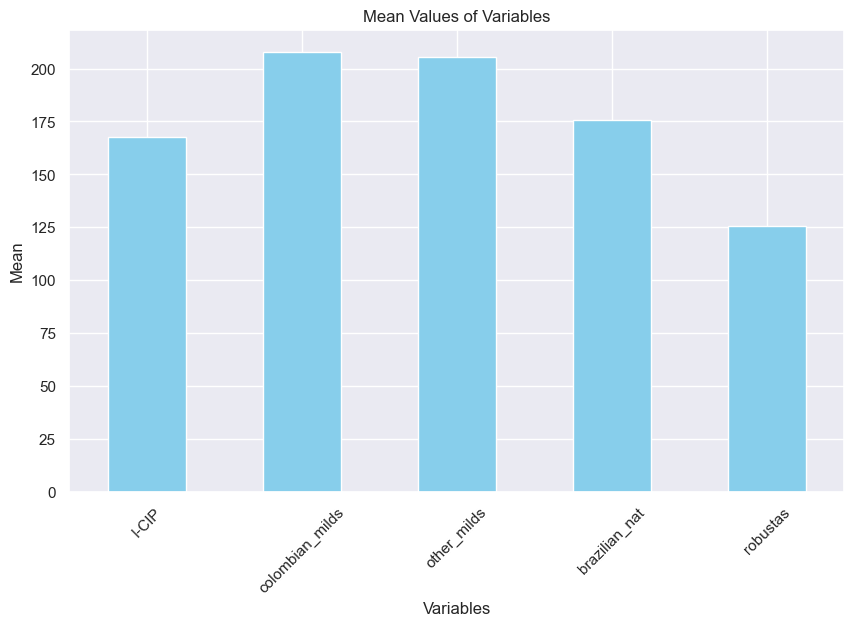

In [41]:
# Bar plot
plt.figure(figsize=(10, 6))
icip_df.mean().plot(kind='bar', color='skyblue')
plt.title('Mean Values of Variables')
plt.xlabel('Variables')
plt.ylabel('Mean')
plt.xticks(rotation=45)
plt.show()

### Checking Normality and Outliers

- Outliers: Data points significantly distant from the mean or outside the IQR.
- Z-score: Measures distance from the mean in terms of standard deviations.
- Interquartile Range (IQR): Indicates the spread of the middle 50% of the data.

Outliers can affect the analysis in many ways. They can skew your data and affect the mean and standard deviation, making it difficult to obtain accurate estimates. Outliers can also affect the regression line and lead to incorrect predictions. Therefore, it is crucial to identify and exclude outliers before conducting any analysis.

For the sake of this experient, at least at this fisrt stage only the I-CIP values will be considered for now. (however, i could also only attempt to forescast with one of the beans from the composite price: the 
So ill store the values on a separate datframe and check for distribution and outliers only with this feature.


Other things to consider:

 When dealing with stock prices and index prices, considering the frequency is an important attribute. In this case, using a frequency of 'B' for Business days, we must also include the holidays? but then which ones are considered by the ico to formulate this prices and how can i check the effects of them in the closing prices? 
 
On Priya Lingutla' tutorial, she mentions a way to also include the holidays in the analysis. Her project was based on sales demand using fb prophet, but for stock prices I am not entirely sure how the data could be affecte, since we use only closing prices for the predictions. Once the pirce is close it s https://github.com/priyalingutla/30-Days-Of-Data/blob/main/DAY%201%20Forecasting%20%2330daysofdata.ipynb
 
   
   "Futures contracts are financial derivatives that obligate the buyer to purchase an asset (in this case, coffee) or the seller to sell an asset at a predetermined future date and price. In the case of coffee futures, the price is typically determined based on various factors such as <b>supply and demand dynamics, weather conditions affecting coffee production, geopolitical events, and market sentiment<b/>."
    
 As of 20/mar - To gather more historical data on the icip values further back 22 on, i still dont have an answer from cct or ico, but there is a way to access yahoo finance api to collect the data from Brazilian naturals (arabica beans) https://finance.yahoo.com/quote/KCK24.NYB // https://www.nasdaq.com/articles/arabica-coffee-under-pressure-from-weakness-in-the-brazilian-real
        

In [42]:
# Create a new DataFrame with only the 'date' and 'I-CIP' columns
price_df = icip_df[['I-CIP']].copy()

# Display the first few rows of the new DataFrame
print(price_df.head())

# Save the new DataFrame to a CSV file
price_df.to_csv('icip_prices.csv', index=False)

             I-CIP
date              
2023-02-01  171.43
2023-02-02  172.50
2023-02-03  169.47
2023-02-06  171.29
2023-02-07  172.14


In [43]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 279 entries, 2023-02-01 to 2024-02-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   I-CIP   279 non-null    float64
dtypes: float64(1)
memory usage: 4.4 KB


In [44]:


# Create histogram
fig = px.histogram(price_df, x='I-CIP', nbins=30) #changing the number of bins makes the curve clearer, 10, 20 were also used

# Update layout
fig.update_layout(
    title='I-CIP Histogram',
    xaxis_title='Price',
    yaxis_title='Frequency'
)

# Show plot
fig.show()

From the histogram above, we can see the data doensnt show a normal distribution of values, the graph below a kde is added to the plot to make it even clearer. The Bimodal distribution indicates 

[Text(0.5, 0, 'i-cip'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'ICO Composite Prices  Histogram')]

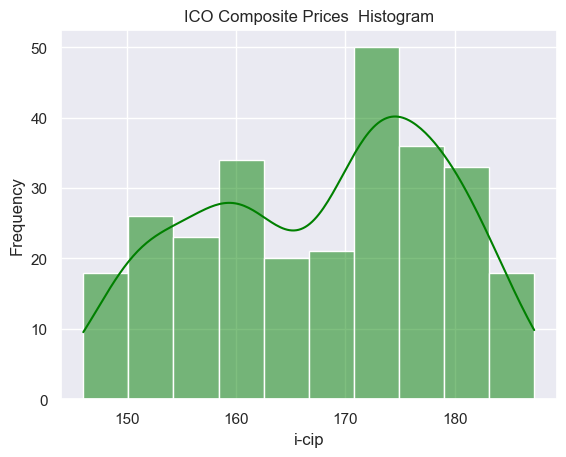

In [45]:
# Changing some of the aesthetics... adding in a kernel desnity estimate:
ax = sns.histplot(price_df['I-CIP'], kde=True, color ='green')
ax.set(xlabel='i-cip',
       ylabel='Frequency',
       title ="ICO Composite Prices  Histogram")

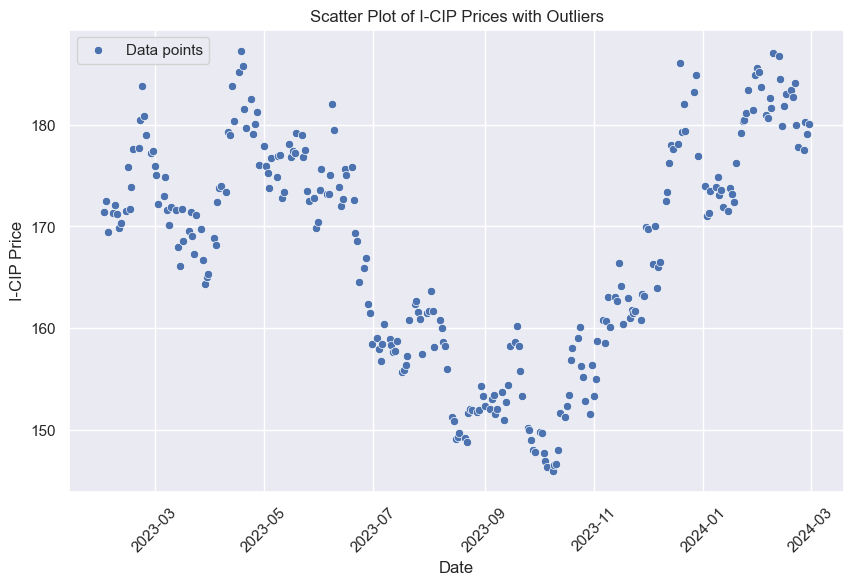

In [47]:
# Calculate Z-score for each data point
price_df['I-CIP_Zscore'] = (price_df['I-CIP'] - price_df['I-CIP'].mean()) / price_df['I-CIP'].std()

# Define threshold for outlier detection (e.g., Z-score > 3 or < -3)
outlier_threshold = 3

# Filter outliers based on the threshold
outliers = price_df[np.abs(price_df['I-CIP_Zscore']) > outlier_threshold]

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='date', y='I-CIP', data=price_df, label='Data points')
sns.scatterplot(x='date', y='I-CIP', data=outliers, color='red', label='Outliers')
plt.title('Scatter Plot of I-CIP Prices with Outliers')
plt.xlabel('Date')
plt.ylabel('I-CIP Price')
plt.legend()
plt.xticks(rotation=45)
plt.show()

## Decomposing our data for Seasonality and Trend 

The first part of the next code will consists of a lineplot to visualize the time series data of how the values change over time. Next is performed a seasonal decomposition for each column in the DataFrame. It iterates over each column, decomposes the time series into trend, seasonal, and residual/noise components using the seasonal decompose function from statsmodels, and plots the decomposed components. This helps in understanding the underlying patterns and trends in the data.

"Decomposition provides a useful abstract model for thinking about time series generally and for better understanding problems during time series analysis and forecasting." Brownlee,2020 https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/

"Decomposition is the process of breaking down a time series into its constituent components, typically trend, seasonality, and residual (noise). Trend represents the long-term movement or directionality of the data, seasonality captures periodic fluctuations, and residual represents random fluctuations or noise. Decomposition helps understanding the underlying patterns in the data before modeling and forecasting" Dey, 2024 (https://medium.com/@roshmitadey/time-series-decomposition-62cbf31ab65e)
Bonaros, 2021 (https://towardsdatascience.com/time-series-decomposition-in-python-8acac385a5b2)

Finally, the last part of the code returns the autocorrelation function (ACF) and partial autocorrelation function (PACF) plots for each column in the DataFrame. 
Each plot gives us insights about the autocorrelation and partial autocorrelation at different lags, to help identify the order of autoregressive (AR) and moving average (MA) terms for time series modeling.


Other ways to decompose data for timeseries models, (advanced tecniques for more complex, irregular or non-stationary data)
- Seasonal and Trend decomposition using Loess (STL)
- Wavelet Decomposition
- Singular Spectrum Analysis (SSA):

(Dey, 2024)

In [ ]:
import keras
import tensorflow as tf

print("Keras version:", keras.__version__)
print("TensorFlow version:", tf.__version__)

In [ ]:

# Initially had the seasonal deco and ACF of all columns gathered in the same code, 
#ended up being too crowded/poluted and hard to comprehend. They are marked as comments bellow. 

# Visualize how values change over time
icip_df.plot(figsize=(12, 6))
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

# Seasonal decomposition
for column in icip_df.columns:
    decomposition = seasonal_decompose(icip_df[column], model='additive', period=5)
    decomposition.plot()
    plt.suptitle(f'{column} Decomposition')
    plt.tight_layout()  # Add this line to adjust subplot parameters
    plt.show()

# ACF and PACF plots
#for column in icip_df.columns:
 #   fig, ax = plt.subplots(2, 1, figsize=(10, 6))
  #  plot_acf(icip_df[column], ax=ax[0], lags=40)
   # plot_pacf(icip_df[column], ax=ax[1], lags=40)
    #ax[0].set_title(f'ACF and PACF for {column}')
    #plt.tight_layout()  # Add this line to adjust subplot parameters
   # plt.show()

From the timeseries plot above, overall we can see most of the features folow a similar pattern. The 'robustas' feature, however not only has the lowest values compared to other beans but it also display a unusiul pattern at least at the begining of the year (many unknown reasons for that... a- not being in harvest season; b- the assumption there are less farms producing this beans because historically is cheaper and dont have a substantial demand as the natural beans, bringing less return to farmers and therephore a smaller volume being traded on the markets, c- stereotype that robusta beans are less 'noble' than natural and often times are not considered for the speciality coffee parameters because of 'less flavou notes or weaker tasting profiles?')
The robustas line show a steady but modest increase until july where its pattern atarts to match with the other beans, with slight ups and downs  until nov23 where the curve finds a cresent point follwed bya sharp (?) descrease in mid january .



For this next line will extract the I-CIP column for shorten the analysis, at least in the early stage. Having a separate df containing data only from the date and icip values to start a more simple version to prepare the data for modeling. 

- Using autoregressor models and compare simple regression models (linear, logaritimc, lasso) to LSTM or other deep learning model. 


In [ ]:
column = 'I-CIP'
decomposition = seasonal_decompose(icip_df[column], model='additive', period=5)
decomposition.plot()
plt.suptitle(f'{column} Decomposition')
plt.tight_layout()  # Add this line to adjust subplot parameters
plt.show()



Seasonal Decomposition with a period of 1/5/12/30/60    (180/360 not possible because dataset is too small)
and different models (additive or multiplicative)



In [ ]:
# Perform seasonal decomposition with different parameters
decomposition = seasonal_decompose(icip_df['I-CIP'], model='multiplicative', period=5)
decomposition.plot()
plt.suptitle(f'{column} Decomposition')
plt.tight_layout()  # Add this line to adjust subplot parameters
plt.show()

#residuals are different, less noise in the multiplicative model 

## Using Business Days as Lags for ACF and PACF

Using a lag of 5 to capture the weekly patterns





In [ ]:
# ACF and PACF plots
for column in icip_df.columns:
    fig, ax = plt.subplots(2, 1, figsize=(12, 8))
    plot_acf(icip_df[column], ax=ax[0], lags=30)
    plot_pacf(icip_df[column], ax=ax[1], lags=30)
    ax[0].set_title(f'ACF and PACF for {column}')
    plt.tight_layout()  # Add this line to adjust subplot parameters
    plt.show()